Custom KNN Accuracy: 95.00%


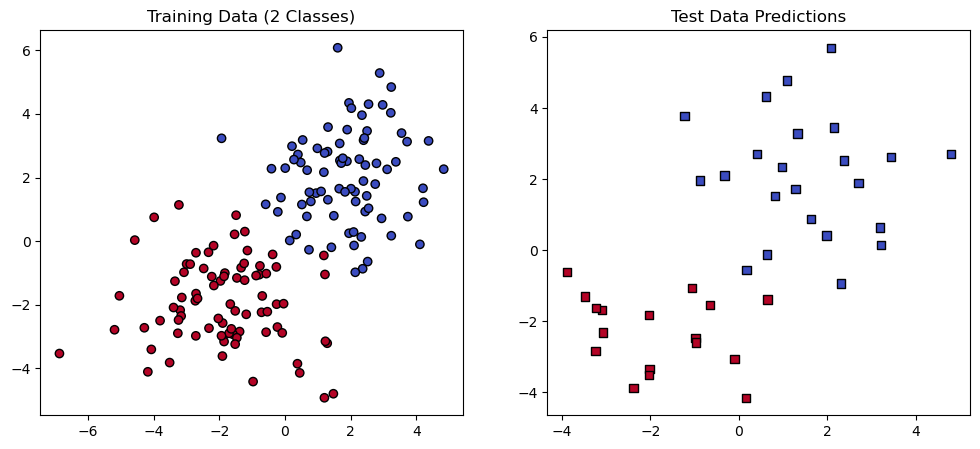

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic random data
np.random.seed(42)
num_samples = 200
num_classes = 2
# Generate two clusters of random points
class_0 = np.random.randn(num_samples//2, 2) * 1.5 + [2, 2]
class_1 = np.random.randn(num_samples//2, 2) * 1.5 + [-2, -2]

X = np.vstack([class_0, class_1])
y = np.hstack([np.zeros(num_samples//2), np.ones(num_samples//2)])

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 3: Implement KNN Classifier from scratch
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k       
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train        
    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            # Calculate Euclidean distances
            distances = np.sqrt(np.sum((self.X_train - test_point)**2, axis=1))
            # Get indices of k nearest neighbors
            nearest_indices = np.argpartition(distances, self.k)[:self.k]          
            # Get labels of nearest neighbors
            nearest_labels = self.y_train[nearest_indices]
            # Majority vote
            counts = np.bincount(nearest_labels.astype(int))
            prediction = np.argmax(counts)
            predictions.append(prediction)          
        return np.array(predictions)
# Step 4: Train and test the classifier
knn = KNNClassifier(k=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Custom KNN Accuracy: {accuracy:.2%}")
# Step 5: Visualization
plt.figure(figsize=(12, 5))
# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title("Training Data (2 Classes)")
# Plot test data with predictions
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='coolwarm', 
           edgecolors='k', marker='s', linewidth=1)
plt.title("Test Data Predictions")
plt.show()

In [4]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def kmeans(X, k, max_iters=100):
    # Randomly initialize centroids
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]#Randomly 3 clusters are selected
    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = np.array([np.argmin([euclidean_distance(x, centroid) for centroid in centroids]) for x in X])
        
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # If centroids have converged, break
        if np.allclose(centroids, new_centroids):
            break        
        centroids = new_centroids
        
    return centroids, labels
    
# Example usage:
if __name__ == "__main__":
    # Example data points
    X = np.array([[1.0, 1.0], [1.5, 2.0], [3.0, 4.0], [5.0, 7.0], [3.5, 5.0], [4.5, 5.0],[3.5, 4.5]])
    # Number of clusters
    k = 3
    # Running K-means clustering
    centroids, labels = kmeans(X, k)
    print("Centroids:")
    print(centroids)
    print("Labels:")
    print(labels)

Centroids:
[[4.75       6.        ]
 [1.25       1.5       ]
 [3.33333333 4.5       ]]
Labels:
[1 1 2 0 2 0 2]
